In [3]:
import skfmm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import time

In [4]:
ns  = 10
nx = 70
nz = 70
zmin = 0.; deltaz = 0.01; zmax = (nz-1)*deltaz;
xmin = 0.; deltax = 0.01; xmax = (nx-1)*deltax;

sz = 0.
sx = np.round(np.arange(deltax,xmax+deltax,0.07),2)

z = np.arange(zmin,zmax+deltaz,deltaz)
nz = z.size

x = np.arange(xmin,xmax+deltax,deltax)
nx = x.size

Z,X,SX = np.meshgrid(z,x,sx,indexing='ij')

SZ = np.ones(SX.shape)*sz # Creating an array of sources along z with same size as SX

for i in range(1, 61):

    vel = np.load('./model3/model_%d.npy'%(i)) 
    #vel[0:5,:] = 1.5
    vels = gaussian_filter(vel, sigma=1)
     
    Tdata = []
    # T_data calculation
    for j in range(0,ns):
        phi = np.ones(vel.shape)
        phi[0,j*7+1] = 0    
        t = skfmm.travel_time(phi, vels, dx=0.01)
        Tdata.append(t)
    Tdata = np.asarray(Tdata)
    Tdata =Tdata.transpose((1,2,0))
    np.save('./model3/T_data%d.npy'%(i),Tdata)
    # T0_data calculation
    velmodel = np.repeat(vel[...,np.newaxis],sx.size,axis=2)
    vs = velmodel[np.round(SZ/deltaz).astype(int),np.round(SX/deltax).astype(int),0] # Velocity at the source location
    T0 = np.sqrt((Z-SZ)**2 + (X-SX)**2)/vs
    np.save('./model3/T0_data%d.npy'%(i),T0)
    

FMM prediction time: 0.004363298416137695
FMM prediction time: 0.0030100345611572266
FMM prediction time: 0.002409696578979492
FMM prediction time: 0.0025146007537841797
FMM prediction time: 0.0019180774688720703
FMM prediction time: 0.0014972686767578125
FMM prediction time: 0.0016317367553710938
FMM prediction time: 0.0018486976623535156
FMM prediction time: 0.0015790462493896484
FMM prediction time: 0.0014736652374267578
FMM prediction time: 0.0016527175903320312
FMM prediction time: 0.002201557159423828
FMM prediction time: 0.0021927356719970703
FMM prediction time: 0.0016317367553710938
FMM prediction time: 0.0015730857849121094
FMM prediction time: 0.0014011859893798828
FMM prediction time: 0.0014007091522216797
FMM prediction time: 0.0014028549194335938
FMM prediction time: 0.001390695571899414
FMM prediction time: 0.001413106918334961
FMM prediction time: 0.0014946460723876953
FMM prediction time: 0.0015027523040771484
FMM prediction time: 0.0014057159423828125
FMM prediction t

FMM prediction time: 0.0014812946319580078
FMM prediction time: 0.0013897418975830078
FMM prediction time: 0.0013885498046875
FMM prediction time: 0.002067089080810547
FMM prediction time: 0.0014150142669677734
FMM prediction time: 0.0014564990997314453
FMM prediction time: 0.0022029876708984375
FMM prediction time: 0.002508878707885742
FMM prediction time: 0.0014047622680664062
FMM prediction time: 0.0014967918395996094
FMM prediction time: 0.002155780792236328
FMM prediction time: 0.0014085769653320312
FMM prediction time: 0.0014071464538574219
FMM prediction time: 0.0014221668243408203
FMM prediction time: 0.001417398452758789
FMM prediction time: 0.0014324188232421875
FMM prediction time: 0.0014159679412841797
FMM prediction time: 0.002016782760620117
FMM prediction time: 0.0023179054260253906
FMM prediction time: 0.0016360282897949219
FMM prediction time: 0.0014891624450683594
FMM prediction time: 0.0013909339904785156
FMM prediction time: 0.0013995170593261719
FMM prediction time

FMM prediction time: 0.0014045238494873047
FMM prediction time: 0.0024132728576660156
FMM prediction time: 0.002201557159423828
FMM prediction time: 0.0014095306396484375
FMM prediction time: 0.0021626949310302734
FMM prediction time: 0.001413106918334961
FMM prediction time: 0.0014116764068603516
FMM prediction time: 0.0014028549194335938
FMM prediction time: 0.00141143798828125
FMM prediction time: 0.0014052391052246094
FMM prediction time: 0.0013659000396728516
FMM prediction time: 0.0014908313751220703
FMM prediction time: 0.0021266937255859375
FMM prediction time: 0.0014951229095458984
FMM prediction time: 0.0013990402221679688
FMM prediction time: 0.0014004707336425781
FMM prediction time: 0.0014100074768066406
FMM prediction time: 0.0014047622680664062
FMM prediction time: 0.0013833045959472656
FMM prediction time: 0.0020198822021484375
FMM prediction time: 0.0021886825561523438
FMM prediction time: 0.001470804214477539
FMM prediction time: 0.0013756752014160156
FMM prediction t

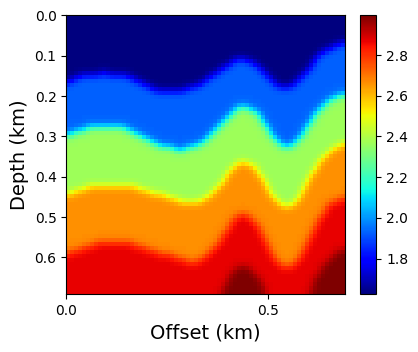

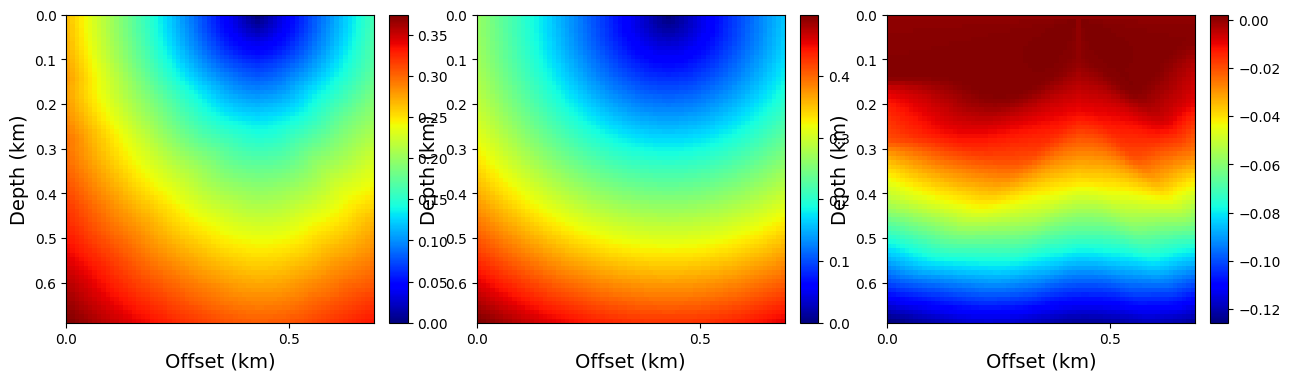

In [4]:
isour = 6
plt.style.use('default')
plt.figure(figsize=(4,4))
ax = plt.gca()
im = ax.imshow(vels, extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Offset (km)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
ax = plt.gca()
im = ax.imshow(Tdata[:,:,isour], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Offset (km)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)
plt.subplot(1,3,2)
ax = plt.gca()
im = ax.imshow(T0[:,:,isour], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Offset (km)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)
plt.subplot(1,3,3)
ax = plt.gca()
im = ax.imshow(Tdata[:,:,isour]-T0[:,:,isour], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Offset (km)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)